In this problem am working for financial institution and part of the job is to build a model that predicts if a credit card transaction is fraudulent or not.I going to model the problem as a binary classification problem i.e A transaction belongs to the positive class (1) if it is a fraud, otherwise it belongs to the negative class (0).
So in this problem we are working with highly inbalanced dataset since most of the transactions are legitimate, so the main focus is to have a model that makes an informed decision on what kind of a transaction is beong performed.

In [1]:
#load the sets from kaggle
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

In [2]:
#load the data set using the open datasets library
#using the Kaggle API token load the data in csv format
od.download("https://www.kaggle.com/mlg-ulb/creditcardfraud")

df = pd.read_csv("creditcardfraud/creditcard.csv")

Skipping, found downloaded files in "./creditcardfraud" (use force=True to force download)


In [3]:
print("There are " + str(len(df)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(df.columns)) + " variables in the dataset.")
#view some values in the set
df.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#missing values in the set
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values in the set, so we can go ahead and visualize the fraudulent and legitimate transactions

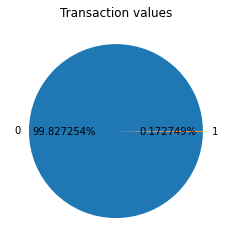

In [5]:
labels = df.Class.unique()
sizes = df.Class.value_counts().values
#plot a pie chart showing the different transaction values
fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%2.6f%%')
ax.set_title("Transaction values")
plt.show()

we have 99.82 percent of the transactions as legitimate and 0.17 percent of fraudulent transactions, quite inbalanced
but it can always work for us.

so I'll bias the model to pay more attention to the minority class of fraudulent transactions


(array([2.84713e+05, 8.40000e+01, 6.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00]),
 array([    0.  ,  4281.86,  8563.72, 12845.58, 17127.44, 21409.3 ,
        25691.16]),
 <BarContainer object of 6 artists>)

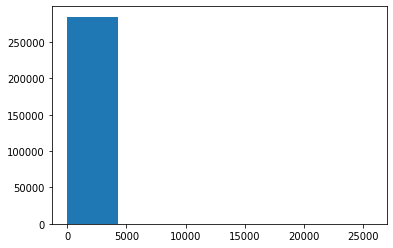

In [6]:
#visualize the different transaction amounts
plt.hist(df.Amount.values,6,histtype="bar")

In [7]:
#minimum and maximum amount of the transaction values
print("The minimum amount of the transactions", np.min(df.Amount.values))
print("The maximum amount of the transactions", np.max(df.Amount.values))
print("90 % of the transactions have an amount less than or equal to",np.percentile(df.Amount.values,90))


The minimum amount of the transactions 0.0
The maximum amount of the transactions 25691.16
90 % of the transactions have an amount less than or equal to 203.0


In [8]:
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.metrics import roc_auc_score

In [9]:
#scaling and normalizing the data to have 0 mean and starndard unit variance
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])

data_matrix = df.values

#selecting feature values

X = df.iloc[:,1:30]

#target value

y = df.iloc[:,30]

X = normalize(X,"l1")

In [10]:
#split the data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [11]:
print('X_train.shape :', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape :', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape : (227845, 29) Y_train.shape= (227845,)
X_test.shape : (56962, 29) Y_test.shape= (56962,)


In [12]:
#Train a decision tree classifier on the data and set max_depth to 4
model_dt = DecisionTreeClassifier(max_depth=4)

#fit the model instance to the training data
model_dt.fit(X_train,y_train)

#add a time variable to see how long it takes to train the model on the available data
t0 = time.time()
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  0.00005


In [13]:
#test the model on the testing data and the accuracy score of the model
y_pred = model_dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
#test the accuracy
roc_auc_score(y_test,y_pred)

0.7142065781011335

In [15]:
# import the linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

model_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# train a linear Support Vector Machine model
t0 = time.time()
model_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  5.28


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
#test score of the svm model
y_hat = model_svm.predict(X_test)

svm_acc = roc_auc_score(y_test,y_hat)


In [17]:
svm_acc*100

88.79478282590469

As shown above svm has a higher accuracy compared to decision tree classifier


we can try improve the accuracy of the decision tree classiffier ...

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2